In [1]:
import numpy as np

In [28]:
class Lasso:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None 
        
    def soft_threshold(self, z):
        return np.sign(z) * np.maximum(np.abs(z) - self.alpha, 0)

    def fit(self, X_train, y_train):
        X_mean = X_train.mean()
        y_mean = y_train.mean()
        num = 0
        den = 0
        for i in range(len(X_train)):
            num += (X_train[i] - X_mean) * (y_train[i] - y_mean)
            den += (X_train[i] - X_mean) ** 2

        self.m = self.soft_threshold(num) / den
        self.b = y_mean - self.m * X_mean

    def predict(self, X_test):
        return self.m * X_test + self.b


# Test

In [29]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

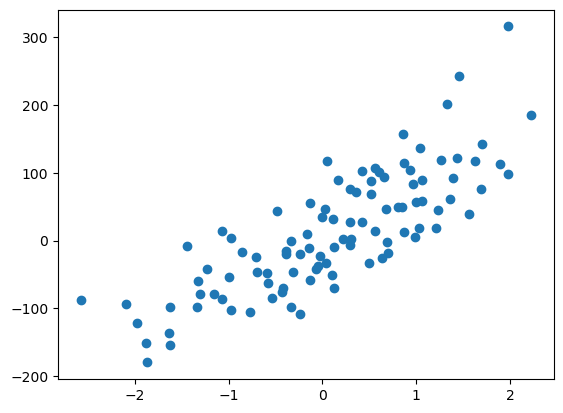

In [30]:
X, y = make_regression(n_samples = 100, n_features = 1, n_targets=1, noise = 50, random_state = 24)
plt.scatter(X, y)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state = 24)

In [34]:
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("r2 score:" ,r2_score(y_test,y_pred))
print("MSE:" ,mean_squared_error(y_test,y_pred))

r2 score: 0.5074588555364669
MSE: 2487.6266536077846


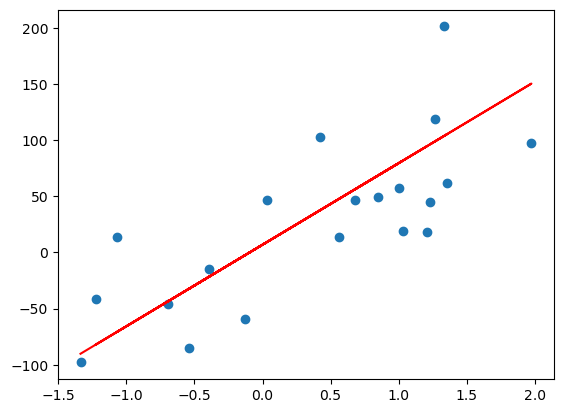

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred,color = 'red')